In [278]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib import rc
import pandas as pd
import os.path as path
from tqdm import tqdm
import scipy
from scipy.stats import linregress
from scipy.integrate import quad, dblquad
from scipy.optimize import curve_fit
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [279]:
file1 = 'Datos 20 Nov.csv'
Data1 = pd.read_csv(file1, sep=' ')
decay1 = np.float64(Data1['N'])

In [280]:
file2 = 'Datos 23 Nov.csv'
Data2 = pd.read_csv(file2, sep=' ')
decay2 = np.float64(Data2['N'])

In [281]:
#Se desprecian los datos de no decaimiento

decay1_clean = decay1[decay1 <= 30000]/1000
decay2_clean = decay2[decay2 <= 30000]/1000
len(decay1_clean), len(decay2_clean)

(5735, 5789)

In [282]:
counts1, bins1 = np.histogram(decay1_clean, bins = 20)
counts2, bins2 = np.histogram(decay2_clean, bins = 60)


In [283]:
new_bins1 = []

for i in range(20):
    new_bins1.append(i+0.5)

In [284]:
new_bins2 = []

for i in range(60):
    new_bins2.append((2*i+1)/6)

In [285]:
#función de ajuste

def f(t, A, tau, B):
    return A*np.exp(-t/tau) + B

In [286]:
param1, cov1 = curve_fit(f, new_bins1,  counts1)
param2, cov2 = curve_fit(f, new_bins2,  counts2)
incertidumbre1 = np.sqrt(np.diag(cov1))
incertidumbre2 = np.sqrt(np.diag(cov2))

param1, incertidumbre1, param2, incertidumbre2

(array([1122.40078974,    2.41956426,  151.96025984]),
 array([23.28939331,  0.08489623,  5.34270525]),
 array([371.74490851,   2.26508813,  54.4257059 ]),
 array([9.50289472, 0.09713288, 2.14549705]))

In [287]:
#Se reajustan los datos con ls radiación de fondo B.

fixed_counts1 = counts1 - round(param1[2])
fixed_counts2 = counts2 - round(param2[2])

def g(t, A, tau):
    return A*np.exp(-t/tau)

In [288]:
new_param1, new_cov1 = curve_fit(g, new_bins1,  fixed_counts1)
new_param2, new_cov2 = curve_fit(g, new_bins2,  fixed_counts2)
new_incertidumbre1 = np.sqrt(np.diag(new_cov1))
new_incertidumbre2 = np.sqrt(np.diag(new_cov2))

new_param1, new_incertidumbre1, new_param2, new_incertidumbre2

(array([1122.40423271,    2.41921896]),
 array([22.61867037,  0.06792309]),
 array([371.70728034,   2.2758975 ]),
 array([9.40070512, 0.08125353]))

In [289]:
x_bins = np.linspace(0, 20, 1000)

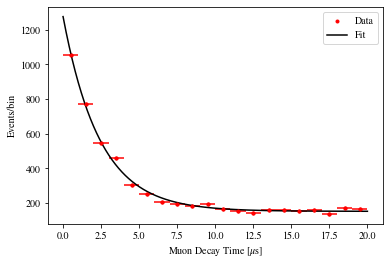

In [290]:
#Gráfico primer set de datos

plt.errorbar(new_bins1, counts1, xerr = 1/2, fmt = '.', color = 'r', )
plt.scatter(new_bins1, counts1, color = 'r', marker = '.', label = 'Data')
plt.plot(x_bins, f(x_bins, *param1), color = 'k', label = 'Fit')
plt.legend()
plt.xlabel(r'Muon Decay Time [$\mu$s]')
plt.ylabel(r'Events/bin')
plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

#plt.savefig('PrimerSet.png', dpi=600, bbox_inches='tight')

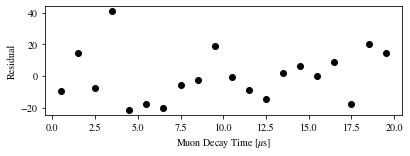

In [291]:
#Residuales primer set

Res1 = []
for i in range(len(new_bins1)):
    Res1.append(counts1[i] - f(new_bins1[i], *param1))

plt.figure(figsize=(6.4,2))
plt.scatter(new_bins1, Res1, color ='k', label = 'Data')
plt.xlabel(r'Muon Decay Time [$\mu$s]')
plt.ylabel(r'Residual')

plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

#plt.savefig('ResPrimerSet.png', dpi=600, bbox_inches='tight')

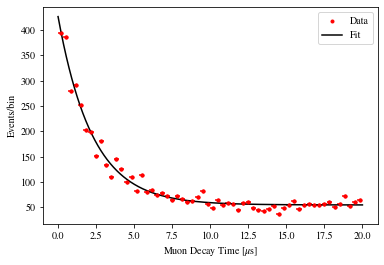

In [292]:
#Gráfico segundo set de datos

plt.errorbar(new_bins2, counts2, xerr = 1/6, fmt = '.', color = 'r', )
plt.scatter(new_bins2, counts2, color = 'r', marker = '.', label = 'Data')
plt.plot(x_bins, f(x_bins, *param2), color = 'k', label = 'Fit')
plt.legend()
plt.xlabel(r'Muon Decay Time [$\mu$s]')
plt.ylabel(r'Events/bin')
plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

#plt.savefig('SegundoSet.png', dpi=600, bbox_inches='tight')


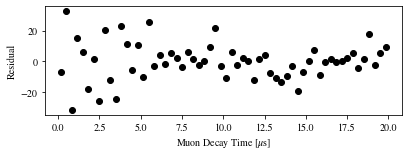

In [293]:
#Residuales segundo set

Res2 = []
for i in range(len(new_bins2)):
    Res2.append(counts2[i] - f(new_bins2[i], *param2))

plt.figure(figsize=(6.4,2))
plt.scatter(new_bins2, Res2, color ='k', label = 'Data')
plt.xlabel(r'Muon Decay Time [$\mu$s]')
plt.ylabel(r'Residual')

plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

#plt.savefig('ResSegundoSet.png', dpi=600, bbox_inches='tight')
